In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from tqdm import tqdm
import pickle
import gzip
import mgzip
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras import optimizers
import tensorflow as tf
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Картинка с текстом

In [2]:
df = pd.read_pickle('/home/sergey/maga_diploma/models/embedding/ready_for_learning.pkl.bz2')

In [3]:
df.shape

(39703, 3073)

In [70]:
y0 = np.random.randint(2, size=(39703,1))

In [4]:
df.head()

,r0000,r0001,r0002,r0003,r0004,r0005,r0006,r0007,r0008,r0009,...,e1015,e1016,e1017,e1018,e1019,e1020,e1021,e1022,e1023,pop_class
-131489096_1083,0.354070,0.312874,0.323759,0.814825,0.364609,0.235031,0.657284,0.115156,0.156165,0.336479,...,0.066441,-0.048359,0.032729,0.028081,0.050865,0.015982,0.048881,-0.034746,-0.009805,0.0
-131489096_1132,0.504149,1.990201,1.073185,0.254006,0.819759,0.916383,0.334561,0.635247,0.332674,1.068352,...,-0.050732,0.041647,0.061442,-0.055081,-0.012973,0.002066,0.076711,-0.025725,0.019724,0.0
-131489096_125,0.183650,0.414233,0.208322,0.300539,0.190956,0.302586,1.077174,0.375937,0.330752,0.428148,...,-0.006816,0.064544,-0.023338,-0.058225,0.065726,0.013296,0.075376,0.007932,0.005242,0.0
-131489096_1266,0.300563,3.707581,0.172072,0.171591,0.490085,0.108678,0.306686,0.288977,1.388826,0.092426,...,-0.047736,0.051996,0.050552,-0.039015,-0.016938,-0.016285,0.054901,0.033297,0.037802,1.0
-131489096_1496,0.323422,0.020913,0.323419,0.105379,0.405946,0.266410,0.266683,0.058426,0.525965,0.171028,...,0.033680,-0.066442,0.052597,0.018187,-0.028047,-0.012803,0.025510,-0.018329,0.061652,0.0


In [3]:
df_data, df_labels = df.iloc[:,:-1], df.iloc[:, -1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.3, shuffle=True)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27792, 3072), (11911, 3072), (27792,), (11911,))

In [15]:
df.pop_class.value_counts(normalize=True)

1.0    0.513765
0.0    0.486235
Name: pop_class, dtype: float64

In [36]:
model = tf.keras.Sequential([
tf.keras.layers.Input(shape=(3072, )),
# tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dropout(.5,),
tf.keras.layers.Dense(1, activation='sigmoid')
])

In [37]:
model.compile(optimizer=tf.keras.optimizers.Adamax(),
              loss='binary_crossentropy',
              metrics=['acc'])

In [38]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(X_test, y_test))

Epoch 1/100
218/218 [==============================] - 1s 4ms/step - loss: 0.6942 - acc: 0.5313 - val_loss: 0.6890 - val_acc: 0.5493
Epoch 2/100
218/218 [==============================] - 1s 3ms/step - loss: 0.6891 - acc: 0.5461 - val_loss: 0.6872 - val_acc: 0.5439
Epoch 3/100
218/218 [==============================] - 1s 3ms/step - loss: 0.6871 - acc: 0.5581 - val_loss: 0.6846 - val_acc: 0.5611
Epoch 4/100
218/218 [==============================] - 1s 2ms/step - loss: 0.6845 - acc: 0.5651 - val_loss: 0.6831 - val_acc: 0.5635
Epoch 5/100
218/218 [==============================] - 1s 3ms/step - loss: 0.6830 - acc: 0.5693 - val_loss: 0.6807 - val_acc: 0.5666
Epoch 6/100
218/218 [==============================] - 1s 3ms/step - loss: 0.6815 - acc: 0.5699 - val_loss: 0.6801 - val_acc: 0.5739
Epoch 7/100
218/218 [==============================] - 1s 3ms/step - loss: 0.6792 - acc: 0.5762 - val_loss: 0.6794 - val_acc: 0.5745
Epoch 8/100
218/218 [==============================] - 1s 2ms/step - 

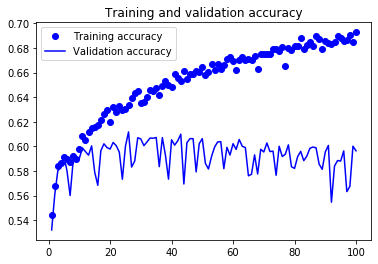

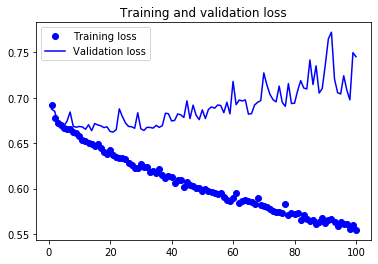

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Текст

In [2]:
df = pd.read_pickle('/home/sergey/maga_diploma/models/embedding/ready_for_learning_text.pkl.bz2')

In [4]:
df.head()

,e0000,e0001,e0002,e0003,e0004,e0005,e0006,e0007,e0008,e0009,...,e0503,e0504,e0505,e0506,e0507,e0508,e0509,e0510,e0511,pop_class
-131489096_1536,-0.071052,0.078491,0.070725,0.006703,-0.023783,0.065908,-0.054581,-0.021802,0.035093,-0.011732,...,0.018130,-0.034931,-0.029609,0.054124,0.010048,-0.022030,0.067829,-0.049517,-0.005817,0.0
-131489096_1707,-0.042542,0.019951,-0.019344,-0.026977,-0.124774,0.091755,0.036859,-0.001630,-0.095213,0.039167,...,-0.004556,0.060113,0.095178,-0.035520,-0.011232,0.040187,-0.000439,0.003896,0.029906,1.0
-131489096_1727,-0.079118,0.053481,-0.046336,-0.040315,-0.035297,-0.075924,-0.032544,-0.009859,0.061949,-0.032239,...,0.001669,-0.081902,-0.087978,0.049714,-0.037525,0.011506,0.035730,-0.032337,0.028385,1.0
-131489096_18,-0.012275,0.060460,-0.003159,0.039230,-0.082074,0.001104,-0.012607,0.061614,-0.019939,-0.014593,...,0.051654,-0.033805,0.014837,0.015563,0.062732,-0.047507,0.054467,0.031372,0.034845,0.0
-131489096_1885,-0.041604,0.078344,0.041739,0.000572,-0.034699,0.061883,0.075703,0.009917,-0.035064,0.042859,...,0.005498,-0.039747,-0.025182,-0.010262,0.038952,-0.054261,-0.058476,-0.039204,0.040795,1.0


In [7]:
df.shape

(24681, 513)

In [5]:
df_data, df_labels = df.iloc[:,:-1], df.iloc[:, -1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.3, shuffle=True)

In [8]:
df.pop_class.value_counts(normalize=True)

1.0    0.526721
0.0    0.473279
Name: pop_class, dtype: float64

In [24]:
model = tf.keras.Sequential([
tf.keras.layers.Input(shape=(512, )),
# tf.keras.layers.Dense(192, activation='relu'),
# tf.keras.layers.Dropout(.5,), 
# tf.keras.layers.Dense(64, activation='relu'),
# tf.keras.layers.Dropout(.5,), 
tf.keras.layers.Dense(32, activation='relu'),
# tf.keras.layers.Dense(32, activation='tanh'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

In [35]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

In [34]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/100
270/270 [==============================] - 1s 2ms/step - loss: 0.6866 - acc: 0.5672 - val_loss: 0.6785 - val_acc: 0.5896
Epoch 2/100
270/270 [==============================] - 0s 2ms/step - loss: 0.6716 - acc: 0.5966 - val_loss: 0.6700 - val_acc: 0.5897
Epoch 3/100
270/270 [==============================] - 0s 2ms/step - loss: 0.6654 - acc: 0.5992 - val_loss: 0.6681 - val_acc: 0.5926
Epoch 4/100
270/270 [==============================] - 1s 2ms/step - loss: 0.6623 - acc: 0.6047 - val_loss: 0.6678 - val_acc: 0.5907
Epoch 5/100
270/270 [==============================] - 0s 2ms/step - loss: 0.6609 - acc: 0.6066 - val_loss: 0.6677 - val_acc: 0.5893
Epoch 6/100
270/270 [==============================] - 0s 2ms/step - loss: 0.6595 - acc: 0.6075 - val_loss: 0.6692 - val_acc: 0.5915
Epoch 7/100
270/270 [==============================] - 0s 2ms/step - loss: 0.6584 - acc: 0.6073 - val_loss: 0.6677 - val_acc: 0.5938
Epoch 8/100
270/270 [==============================] - 0s 2ms/step - 

KeyboardInterrupt: 

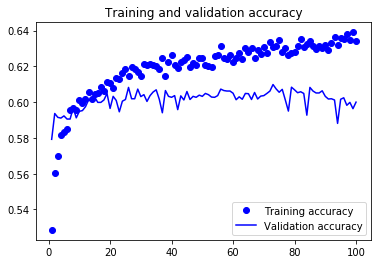

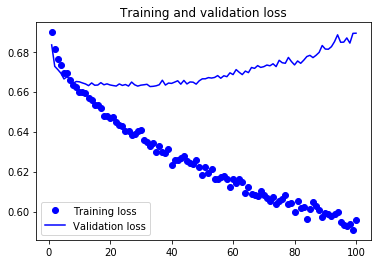

In [65]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Изображение

In [52]:
df = pd.read_pickle('/home/sergey/maga_diploma/models/embedding/ready_for_learning_img.pkl.bz2')

In [13]:
df.head()

,r0000,r0001,r0002,r0003,r0004,r0005,r0006,r0007,r0008,r0009,...,e0503,e0504,e0505,e0506,e0507,e0508,e0509,e0510,e0511,pop_class
-95355317_1912231,0.730447,0.334592,0.366530,0.700113,0.722121,0.352864,1.071003,0.506257,0.323148,0.401336,...,0.074570,0.030460,0.023817,0.048192,0.020022,0.028984,-0.010466,0.062708,0.031740,1.0
-95355317_1912549,0.123836,0.228243,0.149554,0.853837,1.242143,0.422960,0.375921,0.176541,0.341654,0.374464,...,-0.001931,0.067328,-0.012495,-0.037374,0.037465,0.038123,0.062638,0.055634,0.028231,1.0
-95355317_1912669,0.467911,1.090034,0.114930,0.514959,0.761118,0.795357,0.368302,0.697604,0.068003,0.528948,...,0.000897,-0.003645,-0.012373,-0.040513,0.010346,-0.031779,0.010310,0.060112,0.034639,1.0
-95355317_1913056,0.348208,2.478139,0.067870,0.454106,0.282434,0.053392,0.143019,0.132221,0.286292,0.864429,...,-0.020462,0.076333,-0.024339,0.050650,0.009225,-0.056164,-0.007539,-0.020620,-0.009539,1.0
-95355317_1913665,0.125304,0.472944,0.227875,0.088528,0.493635,0.203640,0.238887,0.064549,0.188995,0.104107,...,0.061493,0.011887,0.037677,0.029833,0.059913,0.022351,0.061967,0.046754,0.004338,1.0


In [16]:
df.drop(df.iloc[:, 2048:-1], inplace = True, axis = 1)

In [53]:
df_data, df_labels = df.iloc[:,:-1], df.iloc[:, -1]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df_data, y0, test_size=0.3, shuffle=True)

In [63]:
model = tf.keras.Sequential([
tf.keras.layers.Input(shape=(2560,)),
# tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dropout(.4,),
tf.keras.layers.Dense(32, activation='relu'),
# tf.keras.layers.Dense(32, activation='tanh'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

In [64]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(X_test, y_test))

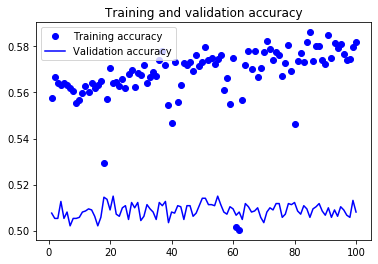

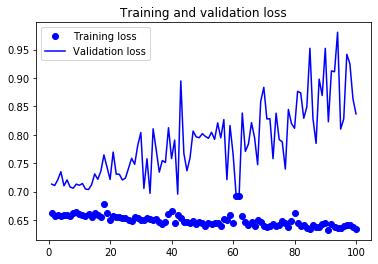

In [67]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Версия 2:

### Изображение с текстом

In [87]:
final_df = pd.read_pickle('filtered_dataset_v2_views.pkl')

In [41]:
final_df = pd.read_pickle('filtered_dataset_v2.pkl')

In [88]:
final_df['full_id'] = final_df.apply(lambda row: f"{row['id_community']}_{row['id_post']}", axis=1)

In [89]:
final_df.head()

,id_community,id_post,date_posted,count_likes,count_views,count_comments,count_reposts,text_post,image_url,post_url,...,level_sentiment_ocr_1,level_sentiment_ocr_2,description_image,spell_text_with_re,perc_unk_words,perc_unk_words_re,pop_class,likes_per_views,id_community_str,full_id
1,-95355317,2106041,2022-05-12 12:03:02,6,6342.0,4,9,NaN,https://sun1-18.userapi.com/s/v1/ig2/gwRD8wNJH...,https://vk.com/wall-95355317_2106041,...,0.986787,0.016925,the evolution of korean beauty in 2018 and 2020,когда вс жизнь мечтала стать парнем,0.666667,0.000000,NaN,0.000946,-95355317,-95355317_2106041
3,-95355317,2106029,2022-05-12 10:03:00,9,8934.0,7,5,NaN,https://sun1-55.userapi.com/s/v1/ig2/iyfPNRSKA...,https://vk.com/wall-95355317_2106029,...,0.976321,0.275140,a small console table is made out of a metal,не могу понять стоит или лежит,0.000000,0.000000,NaN,0.001007,-95355317,-95355317_2106029
5,-95355317,2105981,2022-05-11 19:10:00,378,23118.0,2,161,NaN,https://sun1-96.userapi.com/s/v1/ig2/0Etc7GMf3...,https://vk.com/wall-95355317_2105981,...,0.362979,0.239359,the face of a monkey on a screenshot of a cell...,влад крутится ли воздух внутри колеса вчера в ...,0.354167,0.125000,NaN,0.016350,-95355317,-95355317_2105981
6,-95355317,2105977,2022-05-11 17:10:00,32,5581.0,0,42,NaN,https://sun1-83.userapi.com/s/v1/ig2/YQU9ENzXN...,https://vk.com/wall-95355317_2105977,...,0.992889,0.020974,a screenshot of a cell phone message with a cake,это мы когда отмечаете один день без ссор ещё...,0.272727,0.058824,NaN,0.005733,-95355317,-95355317_2105977
8,-95355317,2105968,2022-05-11 12:10:00,19,5397.0,0,23,NaN,https://sun1-54.userapi.com/s/v1/ig2/2mVk4bj_j...,https://vk.com/wall-95355317_2105968,...,0.737168,0.445540,a woman is making a bed with a clock,сегоднялягулоракьше интересно что такого случ...,0.250000,0.083333,NaN,0.003520,-95355317,-95355317_2105968


In [6]:
df_types = final_df.set_index('full_id')['type_post']

In [210]:
df_all = df.join(df_types, how='inner')

In [211]:
df_all.head()

,r0000,r0001,r0002,r0003,r0004,r0005,r0006,r0007,r0008,r0009,...,e1016,e1017,e1018,e1019,e1020,e1021,e1022,e1023,pop_class,type_post
-131489096_1132,0.504149,1.990201,1.073185,0.254006,0.819759,0.916383,0.334561,0.635247,0.332674,1.068352,...,0.041647,0.061442,-0.055081,-0.012973,0.002066,0.076711,-0.025725,0.019724,0.0,img_text
-131489096_116,0.618404,0.229631,0.385940,0.166805,0.256445,1.081719,0.694177,0.243231,0.080181,0.639115,...,0.026623,0.077755,-0.011484,0.017826,-0.010643,-0.025287,0.017689,0.092084,0.0,img_text
-131489096_17,0.459551,1.106512,1.287091,0.108586,0.724643,0.265480,3.377186,0.105274,0.146934,0.060238,...,-0.031237,0.064343,-0.011990,-0.016844,-0.037843,0.043934,0.023766,0.017030,1.0,img_text
-131489096_1714,0.482887,0.884670,0.590978,0.422914,1.170686,0.192091,2.177510,0.432852,0.390224,0.885024,...,-0.038998,0.025799,0.051885,0.054775,0.073862,0.063579,-0.005991,0.027061,1.0,img_text
-131489096_1750,0.454988,0.284798,0.278680,0.179439,0.243893,0.252819,0.496360,0.066653,0.019045,0.413278,...,-0.035027,0.013883,0.024199,0.083350,-0.062966,-0.018042,-0.039200,0.030383,0.0,img_text


In [11]:
df = pd.read_pickle('/home/sergey/maga_diploma/models/embedding/ready_for_learning_v2.pkl.bz2')

In [23]:
df.drop(df.iloc[:, 2048:-1], inplace = True, axis = 1)

In [61]:
df.drop(df.iloc[:, :2048], inplace = True, axis = 1)

In [62]:
df.head()

,e0000,e0001,e0002,e0003,e0004,e0005,e0006,e0007,e0008,e0009,...,e1015,e1016,e1017,e1018,e1019,e1020,e1021,e1022,e1023,pop_class
-131489096_1132,-0.073240,-0.080408,-0.012932,0.016012,-0.028311,-0.057713,0.019536,-0.043351,0.009371,0.006916,...,-0.050732,0.041647,0.061442,-0.055081,-0.012973,0.002066,0.076711,-0.025725,0.019724,0.0
-131489096_116,-0.074694,-0.023748,0.006462,0.006765,-0.048194,0.022866,0.000056,-0.023693,0.018720,-0.023914,...,0.053789,0.026623,0.077755,-0.011484,0.017826,-0.010643,-0.025287,0.017689,0.092084,0.0
-131489096_17,-0.075976,0.023973,0.021746,0.008031,0.002814,0.017817,0.037569,-0.072344,0.011717,0.003601,...,0.050297,-0.031237,0.064343,-0.011990,-0.016844,-0.037843,0.043934,0.023766,0.017030,1.0
-131489096_1714,-0.085765,0.044029,0.023053,-0.046397,-0.047232,-0.053104,0.078925,0.008996,0.055472,0.050868,...,0.000975,-0.038998,0.025799,0.051885,0.054775,0.073862,0.063579,-0.005991,0.027061,1.0
-131489096_1750,-0.027171,-0.033615,0.048673,-0.022015,0.037952,0.029771,0.004333,0.051369,-0.047859,-0.025102,...,0.005875,-0.035027,0.013883,0.024199,0.083350,-0.062966,-0.018042,-0.039200,0.030383,0.0


In [3]:
df.shape

(30887, 3073)

In [16]:
df_data, df_labels = df.iloc[:,:-1], df.iloc[:, -1]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.3, shuffle=True)

In [12]:
model = tf.keras.Sequential([
tf.keras.layers.Input(shape=(3072,)),
# tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dropout(.3,),
# tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(X_test, y_test))

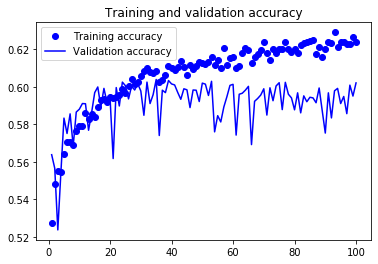

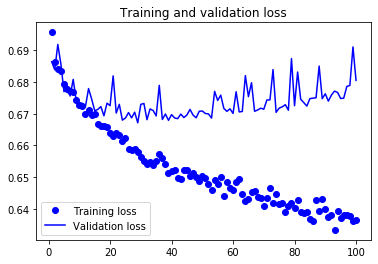

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
model2 = model

In [33]:
y_pred = (model2.predict(X_test) > 0.5).astype(int).flatten()
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [31]:
confusion_matrix(y_test, y_pred, labels=[1.0, 0.0])

array([[3669, 1170],
       [2517, 1911]])

In [44]:
final_df.head()

,id_community,id_post,date_posted,count_likes,count_views,count_comments,count_reposts,text_post,image_url,post_url,...,sentiment_text_ocr_image_1,sentiment_text_ocr_image_2,level_sentiment_ocr_1,level_sentiment_ocr_2,description_image,spell_text_with_re,perc_unk_words,perc_unk_words_re,pop_class,full_id
1,-95355317,2106041,2022-05-12 12:03:02,6,6342.0,4,9,NaN,https://sun1-18.userapi.com/s/v1/ig2/gwRD8wNJH...,https://vk.com/wall-95355317_2106041,...,neutral,positive,0.986787,0.016925,the evolution of korean beauty in 2018 and 2020,когда вс жизнь мечтала стать парнем,0.666667,0.000000,NaN,-95355317_2106041
3,-95355317,2106029,2022-05-12 10:03:00,9,8934.0,7,5,NaN,https://sun1-55.userapi.com/s/v1/ig2/iyfPNRSKA...,https://vk.com/wall-95355317_2106029,...,neutral,negative,0.976321,0.275140,a small console table is made out of a metal,не могу понять стоит или лежит,0.000000,0.000000,0.0,-95355317_2106029
5,-95355317,2105981,2022-05-11 19:10:00,378,23118.0,2,161,NaN,https://sun1-96.userapi.com/s/v1/ig2/0Etc7GMf3...,https://vk.com/wall-95355317_2105981,...,neutral,skip,0.362979,0.239359,the face of a monkey on a screenshot of a cell...,влад крутится ли воздух внутри колеса вчера в ...,0.354167,0.125000,1.0,-95355317_2105981
6,-95355317,2105977,2022-05-11 17:10:00,32,5581.0,0,42,NaN,https://sun1-83.userapi.com/s/v1/ig2/YQU9ENzXN...,https://vk.com/wall-95355317_2105977,...,neutral,skip,0.992889,0.020974,a screenshot of a cell phone message with a cake,это мы когда отмечаете один день без ссор ещё...,0.272727,0.058824,NaN,-95355317_2105977
8,-95355317,2105968,2022-05-11 12:10:00,19,5397.0,0,23,NaN,https://sun1-54.userapi.com/s/v1/ig2/2mVk4bj_j...,https://vk.com/wall-95355317_2105968,...,neutral,positive,0.737168,0.445540,a woman is making a bed with a clock,сегоднялягулоракьше интересно что такого случ...,0.250000,0.083333,0.0,-95355317_2105968


In [50]:
s = ((y_pred == 1) & (y_test == 0)) 
error_ids = s[s == True].index

In [55]:
with open('error_ids.txt', 'w') as f:
    print(*error_ids, sep='\n', file=f)

In [56]:
! head error_ids.txt

-158490202_1982243
-95355317_2003110
-57846937_40230785
-91050183_3454039
-91050183_1776785
-25679656_23771
-25679656_38909
-25679656_1096087
-95355317_1928853
-25679656_8291


In [59]:
! mkdir  ~/bad_results/

In [60]:
! find '/home/sergey/maga_diploma/models/popular/dataset_v2/dataset' -name "*.jpg" | grep -Ff error_ids.txt | head -n200 | parallel 'cp {} ~/bad_results/'

grep: write error: Broken pipe
find: ‘standard output’: Broken pipe
find: write error


In [ ]:
final_df.query('full_id in @error_ids')

In [82]:
final_df.head()

,id_community,id_post,date_posted,count_likes,count_views,count_comments,count_reposts,text_post,image_url,post_url,...,sentiment_text_ocr_image_1,sentiment_text_ocr_image_2,level_sentiment_ocr_1,level_sentiment_ocr_2,description_image,spell_text_with_re,perc_unk_words,perc_unk_words_re,pop_class,full_id
1,-95355317,2106041,2022-05-12 12:03:02,6,6342.0,4,9,NaN,https://sun1-18.userapi.com/s/v1/ig2/gwRD8wNJH...,https://vk.com/wall-95355317_2106041,...,neutral,positive,0.986787,0.016925,the evolution of korean beauty in 2018 and 2020,когда вс жизнь мечтала стать парнем,0.666667,0.000000,NaN,-95355317_2106041
3,-95355317,2106029,2022-05-12 10:03:00,9,8934.0,7,5,NaN,https://sun1-55.userapi.com/s/v1/ig2/iyfPNRSKA...,https://vk.com/wall-95355317_2106029,...,neutral,negative,0.976321,0.275140,a small console table is made out of a metal,не могу понять стоит или лежит,0.000000,0.000000,0.0,-95355317_2106029
5,-95355317,2105981,2022-05-11 19:10:00,378,23118.0,2,161,NaN,https://sun1-96.userapi.com/s/v1/ig2/0Etc7GMf3...,https://vk.com/wall-95355317_2105981,...,neutral,skip,0.362979,0.239359,the face of a monkey on a screenshot of a cell...,влад крутится ли воздух внутри колеса вчера в ...,0.354167,0.125000,1.0,-95355317_2105981
6,-95355317,2105977,2022-05-11 17:10:00,32,5581.0,0,42,NaN,https://sun1-83.userapi.com/s/v1/ig2/YQU9ENzXN...,https://vk.com/wall-95355317_2105977,...,neutral,skip,0.992889,0.020974,a screenshot of a cell phone message with a cake,это мы когда отмечаете один день без ссор ещё...,0.272727,0.058824,NaN,-95355317_2105977
8,-95355317,2105968,2022-05-11 12:10:00,19,5397.0,0,23,NaN,https://sun1-54.userapi.com/s/v1/ig2/2mVk4bj_j...,https://vk.com/wall-95355317_2105968,...,neutral,positive,0.737168,0.445540,a woman is making a bed with a clock,сегоднялягулоракьше интересно что такого случ...,0.250000,0.083333,0.0,-95355317_2105968


In [ ]:
final_df.query('id_community == "-95355317"'), x=final_df.count_views, y=final_df.count_likes) df.plot.scatter(x = 'Name', y = 'Age'

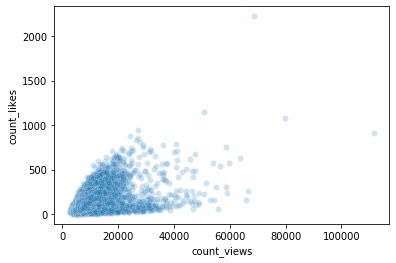

In [86]:
sns.scatterplot(data=final_df.query('id_community == "-95355317"'), x='count_views', y='count_likes', alpha=0.2)

In [74]:
post_id = "-95355317_2007710"
print(final_df.query('full_id == @post_id')['text_ocr_image'].tolist())
print(final_df.query('full_id == @post_id')['spell_text_with_re'].tolist())
final_df.query('full_id == @post_id').transpose()

['Когда поставил греться тарелку седой в микроволнову и она наконец то подогрела еДу а не тарелку Получилось У этого сумасшедшего сукина сына всё получилось']
['когда поставил греться тарелку седой в микроволновку и она наконец то подогрела еду а не тарелку получилось у этого сумасшедшего сукина сына всё получилось']


,7488
id_community,-95355317
id_post,2007710
date_posted,2020-04-12 19:42:00
count_likes,49
count_views,5138
count_comments,0
count_reposts,0
text_post,NaN
image_url,https://sun1-90.userapi.com/s/v1/ig2/46ljDW14Z...
post_url,https://vk.com/wall-95355317_2007710


In [45]:
final_df.set_index('full_id').loc[((y_pred == 1) & (y_test == 0))==True]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [27]:
tn, fp, fn, tp = confusion_matrix(y_test, (model2.predict(X_test) > 0.5).astype(int)).ravel()

In [28]:
(tn, fp, fn, tp)

(1911, 2517, 1170, 3669)

In [195]:
y_pred = []
for index, row in tqdm(X_test.iterrows()):
    pred = model.predict(np.array(row).reshape(1, 3072))
    # kek = row[:-1]
    # break
    
    # Write prediction
    if pred > 0.5:
        y_pred.append(1.0)
    else:
        y_pred.append(0.0)

9267it [03:54, 39.53it/s]


In [191]:
y_true = df_labels.to_list()

In [196]:
confusion_matrix(y_test, y_pred, labels=[1.0, 0.0])

array([[4117,  709],
       [3138, 1303]])

In [212]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [213]:
(tn, fp, fn, tp)

(1303, 3138, 709, 4117)

In [ ]:
def distribution_pop(communities, my_df):
    cnt = 0
    base_dir = '/media/sergey/Transcend/Serega/maga_diplom/images_full/communities/'
    target_dir = '../popular/dataset/'
    for index, row in tqdm(my_df.iterrows()):
        cur_path = base_dir  + communities[int(row['id_community'])] + '/images/' + '_'.join([communities[int(row['id_community'])], str(row['id_community']), str(row['id_post'])]) + '.jpg'
        # command = '[ -f {} ] && echo "exist"'.format(cur_path)
        if not os.path.isfile(cur_path):
            print(cur_path)
            continue
        # print(cur_path)
        if row['pop_class'] == 0.0:
            command = 'cp {} {}'.format(cur_path, target_dir+'not_pop/')
            subprocess.call(command, shell=True)
        else:
            command = 'cp {} {}'.format(cur_path, target_dir+'is_pop/')
            subprocess.call(command, shell=True)
        cnt += 1
        # if cnt == 10:
        #     break
        #owner_id = img_path.split(os.sep)[-1].split('_')[1]
        #id_post = img_path.split(os.sep)[-1].split('_')[-1].split('.')[0]
        # print("_".join([communities[int(owner_id)], owner_id, id_post]) + '.jpg')
    return 0

### Изображение

In [2]:
df = pd.read_pickle('/home/sergey/maga_diploma/models/embedding/ready_for_learning_image_v2.pkl.bz2')

In [8]:
df.shape

(5995, 2561)

In [3]:
df_data, df_labels = df.iloc[:,:-1], df.iloc[:, -1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.3, shuffle=True)

In [20]:
model = tf.keras.Sequential([
tf.keras.layers.Input(shape=(2560,)),
# tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dropout(.3,),
tf.keras.layers.Dense(32, activation='relu'),
# tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test, y_test))

### Текст

In [2]:
df = pd.read_pickle('/home/sergey/maga_diploma/models/embedding/ready_for_learning_text_v2.pkl.bz2')

In [3]:
df.shape

(25673, 513)

In [4]:
df_data, df_labels = df.iloc[:,:-1], df.iloc[:, -1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.3, shuffle=True)

In [13]:
model = tf.keras.Sequential([
tf.keras.layers.Input(shape=(512,)),
# tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dropout(.3,),
# tf.keras.layers.Dense(32, activation='relu'),
# tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

In [15]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/100
281/281 [==============================] - 1s 2ms/step - loss: 0.6733 - acc: 0.5763 - val_loss: 0.6645 - val_acc: 0.5959
Epoch 2/100
281/281 [==============================] - 1s 2ms/step - loss: 0.6607 - acc: 0.6036 - val_loss: 0.6631 - val_acc: 0.6000
Epoch 3/100
281/281 [==============================] - 1s 2ms/step - loss: 0.6534 - acc: 0.6161 - val_loss: 0.6641 - val_acc: 0.5980
Epoch 4/100
281/281 [==============================] - 1s 2ms/step - loss: 0.6454 - acc: 0.6254 - val_loss: 0.6621 - val_acc: 0.6018
Epoch 5/100
281/281 [==============================] - 0s 2ms/step - loss: 0.6358 - acc: 0.6379 - val_loss: 0.6608 - val_acc: 0.6032
Epoch 6/100
281/281 [==============================] - 1s 2ms/step - loss: 0.6272 - acc: 0.6537 - val_loss: 0.6605 - val_acc: 0.6048
Epoch 7/100
281/281 [==============================] - 1s 2ms/step - loss: 0.6148 - acc: 0.6680 - val_loss: 0.6604 - val_acc: 0.6061
Epoch 8/100
281/281 [==============================] - 1s 2ms/step - 

KeyboardInterrupt: 

## Задача регрессии

In [52]:
df = pd.read_pickle('/home/sergey/maga_diploma/models/embedding/ready_for_learning_v2_views_perc.pkl.bz2')

In [6]:
final_df = pd.read_pickle('filtered_dataset_v2_views.pkl')

In [19]:
final_df['full_id'] = final_df.apply(lambda row: f"{row['id_community']}_{row['id_post']}", axis=1)

In [53]:
df_regr = final_df.set_index('full_id')['likes_per_views']

In [54]:
df.drop(df.iloc[:, -1:], inplace = True, axis = 1)

In [ ]:
sorted(final_df['likes_per_views'].to_list())

In [55]:
final_df.head()

,id_community,id_post,date_posted,count_likes,count_views,count_comments,count_reposts,text_post,image_url,post_url,...,level_sentiment_ocr_1,level_sentiment_ocr_2,description_image,spell_text_with_re,perc_unk_words,perc_unk_words_re,pop_class,likes_per_views,id_community_str,full_id
1,-95355317,2106041,2022-05-12 12:03:02,6,6342.0,4,9,NaN,https://sun1-18.userapi.com/s/v1/ig2/gwRD8wNJH...,https://vk.com/wall-95355317_2106041,...,0.986787,0.016925,the evolution of korean beauty in 2018 and 2020,когда вс жизнь мечтала стать парнем,0.666667,0.000000,NaN,0.000946,-95355317,-95355317_2106041
3,-95355317,2106029,2022-05-12 10:03:00,9,8934.0,7,5,NaN,https://sun1-55.userapi.com/s/v1/ig2/iyfPNRSKA...,https://vk.com/wall-95355317_2106029,...,0.976321,0.275140,a small console table is made out of a metal,не могу понять стоит или лежит,0.000000,0.000000,0.0,0.001007,-95355317,-95355317_2106029
5,-95355317,2105981,2022-05-11 19:10:00,378,23118.0,2,161,NaN,https://sun1-96.userapi.com/s/v1/ig2/0Etc7GMf3...,https://vk.com/wall-95355317_2105981,...,0.362979,0.239359,the face of a monkey on a screenshot of a cell...,влад крутится ли воздух внутри колеса вчера в ...,0.354167,0.125000,1.0,0.016350,-95355317,-95355317_2105981
6,-95355317,2105977,2022-05-11 17:10:00,32,5581.0,0,42,NaN,https://sun1-83.userapi.com/s/v1/ig2/YQU9ENzXN...,https://vk.com/wall-95355317_2105977,...,0.992889,0.020974,a screenshot of a cell phone message with a cake,это мы когда отмечаете один день без ссор ещё...,0.272727,0.058824,NaN,0.005733,-95355317,-95355317_2105977
8,-95355317,2105968,2022-05-11 12:10:00,19,5397.0,0,23,NaN,https://sun1-54.userapi.com/s/v1/ig2/2mVk4bj_j...,https://vk.com/wall-95355317_2105968,...,0.737168,0.445540,a woman is making a bed with a clock,сегоднялягулоракьше интересно что такого случ...,0.250000,0.083333,NaN,0.003520,-95355317,-95355317_2105968


In [56]:
df_all = df.join(df_regr, how='inner')

In [57]:
df_all.head()

,r0000,r0001,r0002,r0003,r0004,r0005,r0006,r0007,r0008,r0009,...,e1015,e1016,e1017,e1018,e1019,e1020,e1021,e1022,e1023,likes_per_views
-131489096_1132,0.504149,1.990201,1.073185,0.254006,0.819759,0.916383,0.334561,0.635247,0.332674,1.068352,...,-0.050732,0.041647,0.061442,-0.055081,-0.012973,0.002066,0.076711,-0.025725,0.019724,0.006347
-131489096_1265,0.251803,1.190224,0.120495,0.138350,0.236162,0.440931,0.278131,0.059425,0.122388,0.265998,...,0.016011,0.041277,0.042519,0.025420,-0.027006,-0.024643,-0.020053,-0.003382,0.072733,0.016082
-131489096_1550,0.258184,1.149936,1.051610,0.521807,0.583744,1.484899,0.694612,0.175528,0.289764,1.065465,...,0.006138,0.059124,0.077077,0.050985,-0.081421,-0.013608,-0.090485,0.005553,-0.065614,0.009644
-131489096_1714,0.482887,0.884670,0.590978,0.422914,1.170686,0.192091,2.177510,0.432852,0.390224,0.885024,...,0.000975,-0.038998,0.025799,0.051885,0.054775,0.073862,0.063579,-0.005991,0.027061,0.018980
-131489096_1750,0.454988,0.284798,0.278680,0.179439,0.243893,0.252819,0.496360,0.066653,0.019045,0.413278,...,0.005875,-0.035027,0.013883,0.024199,0.083350,-0.062966,-0.018042,-0.039200,0.030383,0.011691


In [58]:
df_data, df_labels = df_all.iloc[:,:-1], df_all.iloc[:, -1]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.3, shuffle=True)

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18526, 3072), (7941, 3072), (18526,), (7941,))

In [96]:
model = tf.keras.Sequential([
tf.keras.layers.Input(shape=(3072,)),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dropout(.5,),
# tf.keras.layers.Dense(16, activation='relu'),
# tf.keras.layers.Dropout(.25,),
tf.keras.layers.Dense(1, activation='sigmoid')
])

In [97]:
model.compile(optimizer=tf.keras.optimizers.Adamax(),
              loss='mse',
              metrics=['mean_absolute_error', 'mean_absolute_percentage_error'])

In [ ]:
# model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
# # train model
# history = model.fit(X, X, epochs=500, batch_size=len(X), verbose=2)
# # plot metrics
# pyplot.plot(history.history['mean_squared_error'])
# pyplot.plot(history.history['mean_absolute_error'])
# pyplot.plot(history.history['mean_absolute_percentage_error'])
# pyplot.plot(history.history['cosine_proximity'])
# pyplot.show()

In [98]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=128,
                    validation_data=(X_test, y_test))

Epoch 1/100
145/145 [==============================] - 1s 4ms/step - loss: 0.0030 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 111.6836 - val_loss: 0.0021 - val_mean_absolute_error: 0.0313 - val_mean_absolute_percentage_error: 99.5084
Epoch 2/100
145/145 [==============================] - 0s 2ms/step - loss: 0.0022 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 99.2617 - val_loss: 0.0021 - val_mean_absolute_error: 0.0313 - val_mean_absolute_percentage_error: 99.5600
Epoch 3/100
145/145 [==============================] - 0s 3ms/step - loss: 0.0022 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 99.1598 - val_loss: 0.0021 - val_mean_absolute_error: 0.0313 - val_mean_absolute_percentage_error: 99.4913
Epoch 4/100
145/145 [==============================] - 0s 3ms/step - loss: 0.0022 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 99.1779 - val_loss: 0.0021 - val_mean_absolute_error: 0.0313 - val_mean_absolute_percentage_er

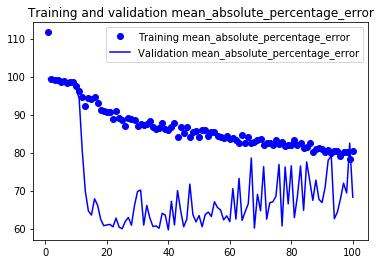

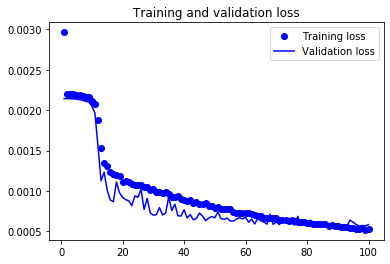

In [102]:
import matplotlib.pyplot as plt

acc = history.history['mean_absolute_percentage_error']
val_acc = history.history['val_mean_absolute_percentage_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training mean_absolute_percentage_error')
plt.plot(epochs, val_acc, 'b', label='Validation mean_absolute_percentage_error')
plt.title('Training and validation mean_absolute_percentage_error')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

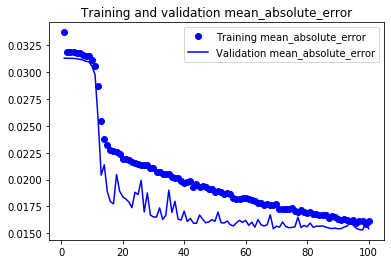

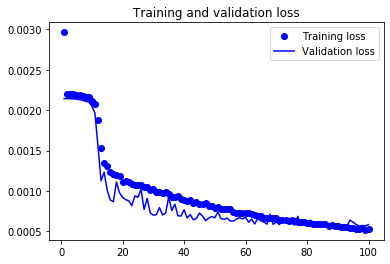

In [103]:
import matplotlib.pyplot as plt

acc = history.history['mean_absolute_error']
val_acc = history.history['val_mean_absolute_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training mean_absolute_error')
plt.plot(epochs, val_acc, 'b', label='Validation mean_absolute_error')
plt.title('Training and validation mean_absolute_error')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Другая мера популярности: включить просмотры (версия 2)

In [440]:
df = pd.read_pickle('/home/sergey/maga_diploma/models/embedding/ready_for_learning_v2_views.pkl.bz2')

In [2]:
df_embeds = pd.read_pickle('/home/sergey/maga_diploma/models/embedding/embeds_clear_text.pkl.bz2')

In [4]:
df = pd.read_pickle('/home/sergey/maga_diploma/models/embedding/ready_for_learning_v2_views_perc.pkl.bz2')

In [438]:
final_df = pd.read_pickle('filtered_dataset_v2_views.pkl')

In [439]:
final_df['full_id'] = final_df.apply(lambda row: f"{row['id_community']}_{row['id_post']}", axis=1)

In [ ]:
final_df['text_post'].str.len().plot(kind='hist)

In [11]:
df.drop(df.iloc[:, 2048:], inplace = True, axis = 1)

In [6]:
df_class = df.iloc[:, -1:]

In [12]:
df.head()

,r0000,r0001,r0002,r0003,r0004,r0005,r0006,r0007,r0008,r0009,...,r2038,r2039,r2040,r2041,r2042,r2043,r2044,r2045,r2046,r2047
-131489096_1132,0.504149,1.990201,1.073185,0.254006,0.819759,0.916383,0.334561,0.635247,0.332674,1.068352,...,0.162667,0.125434,0.358205,1.342077,0.924472,0.147225,0.723711,0.526295,0.115206,0.551816
-131489096_1265,0.251803,1.190224,0.120495,0.138350,0.236162,0.440931,0.278131,0.059425,0.122388,0.265998,...,0.754513,0.367641,0.092059,0.332844,0.545723,0.028454,0.242787,0.026901,0.236403,0.111654
-131489096_1550,0.258184,1.149936,1.051610,0.521807,0.583744,1.484899,0.694612,0.175528,0.289764,1.065465,...,0.426060,0.233259,0.109214,0.588598,0.361745,0.302672,0.488670,0.085390,0.789279,0.214183
-131489096_1714,0.482887,0.884670,0.590978,0.422914,1.170686,0.192091,2.177510,0.432852,0.390224,0.885024,...,1.197761,0.285953,0.140211,1.714458,0.479142,0.110160,0.749284,0.512901,0.413156,0.213269
-131489096_1750,0.454988,0.284798,0.278680,0.179439,0.243893,0.252819,0.496360,0.066653,0.019045,0.413278,...,1.197133,0.233131,0.223354,0.138536,0.616652,0.084547,0.487346,0.107238,0.000499,0.103345


In [14]:
df.shape

(26463, 2049)

In [13]:
df = df.join(df_embeds, how='inner').join(df_class, how='inner')

In [14]:
df.head()

,r0000,r0001,r0002,r0003,r0004,r0005,r0006,r0007,r0008,r0009,...,e1015,e1016,e1017,e1018,e1019,e1020,e1021,e1022,e1023,pop_class
-131489096_1132,0.504149,1.990201,1.073185,0.254006,0.819759,0.916383,0.334561,0.635247,0.332674,1.068352,...,0.086394,0.083460,0.005729,-0.069497,0.071088,-0.003317,0.044090,0.040192,-0.018083,0.0
-131489096_1265,0.251803,1.190224,0.120495,0.138350,0.236162,0.440931,0.278131,0.059425,0.122388,0.265998,...,0.007917,0.047904,0.013311,-0.040388,0.029357,-0.008038,0.063414,0.048371,-0.017995,1.0
-131489096_1550,0.258184,1.149936,1.051610,0.521807,0.583744,1.484899,0.694612,0.175528,0.289764,1.065465,...,0.042225,-0.010017,0.033543,0.055150,0.033807,-0.004147,-0.032124,0.053155,-0.006343,0.0
-131489096_1714,0.482887,0.884670,0.590978,0.422914,1.170686,0.192091,2.177510,0.432852,0.390224,0.885024,...,0.041671,0.032208,-0.005923,-0.021082,0.070846,-0.039873,0.034025,0.064495,-0.007111,1.0
-131489096_1750,0.454988,0.284798,0.278680,0.179439,0.243893,0.252819,0.496360,0.066653,0.019045,0.413278,...,0.035172,-0.051481,0.020180,0.040577,-0.026530,0.027702,-0.103512,-0.010872,0.076001,0.0


In [5]:
df.iloc[:, :2048]

,r0000,r0001,r0002,r0003,r0004,r0005,r0006,r0007,r0008,r0009,...,r2038,r2039,r2040,r2041,r2042,r2043,r2044,r2045,r2046,r2047
-131489096_1132,0.504149,1.990201,1.073185,0.254006,0.819759,0.916383,0.334561,0.635247,0.332674,1.068352,...,0.162667,0.125434,0.358205,1.342077,0.924472,0.147225,0.723711,0.526295,0.115206,0.551816
-131489096_1265,0.251803,1.190224,0.120495,0.138350,0.236162,0.440931,0.278131,0.059425,0.122388,0.265998,...,0.754513,0.367641,0.092059,0.332844,0.545723,0.028454,0.242787,0.026901,0.236403,0.111654
-131489096_1550,0.258184,1.149936,1.051610,0.521807,0.583744,1.484899,0.694612,0.175528,0.289764,1.065465,...,0.426060,0.233259,0.109214,0.588598,0.361745,0.302672,0.488670,0.085390,0.789279,0.214183
-131489096_1714,0.482887,0.884670,0.590978,0.422914,1.170686,0.192091,2.177510,0.432852,0.390224,0.885024,...,1.197761,0.285953,0.140211,1.714458,0.479142,0.110160,0.749284,0.512901,0.413156,0.213269
-131489096_1750,0.454988,0.284798,0.278680,0.179439,0.243893,0.252819,0.496360,0.066653,0.019045,0.413278,...,1.197133,0.233131,0.223354,0.138536,0.616652,0.084547,0.487346,0.107238,0.000499,0.103345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-95355317_2105814,0.293637,0.833387,0.248703,0.199990,0.336965,0.572994,0.148013,0.421204,0.746933,0.537438,...,0.186230,0.326849,0.185956,0.720383,0.422870,0.103904,0.278189,0.338647,0.596740,1.084772
-95355317_2105872,0.191685,1.404809,0.114327,0.660457,0.706482,0.500730,0.735693,0.677150,0.174013,1.055116,...,0.108755,0.959253,0.207974,0.482100,0.741256,0.484356,0.205457,0.308103,0.218068,0.202913
-95355317_2105956,0.159212,0.558260,1.053827,0.243139,0.774887,0.425338,0.562986,0.582318,0.291664,0.436826,...,0.242488,0.190490,0.067878,0.511529,0.444270,0.079815,0.319075,0.068828,0.109666,0.122855
-95355317_2105981,0.096138,0.522328,0.125835,0.971052,0.424403,0.042324,1.361900,0.687133,0.449430,0.331818,...,0.282686,0.436751,0.088770,0.149967,1.124811,0.068868,1.085793,0.352406,0.088098,0.046438


In [256]:
df.head()

,r0000,r0001,r0002,r0003,r0004,r0005,r0006,r0007,r0008,r0009,...,r2039,r2040,r2041,r2042,r2043,r2044,r2045,r2046,r2047,pop_class
-131489096_1012,0.115217,0.109097,0.270934,0.268326,0.541678,0.081371,1.003465,0.021885,1.719520,0.522370,...,0.150230,0.034726,0.117374,0.138449,0.040871,0.270294,0.078701,0.067998,0.166147,1.0
-131489096_1083,0.354070,0.312874,0.323759,0.814825,0.364609,0.235031,0.657284,0.115156,0.156165,0.336479,...,0.061403,0.327731,0.101207,0.518042,0.082220,0.024992,0.282941,0.158757,0.354982,0.0
-131489096_1121,0.003705,0.526552,0.046393,0.012997,0.485686,0.070340,0.166479,0.161234,0.286228,0.045334,...,0.116497,0.019366,0.037637,0.124873,0.030439,0.307940,0.004427,0.012747,0.032711,1.0
-131489096_1132,0.504149,1.990201,1.073185,0.254006,0.819759,0.916383,0.334561,0.635247,0.332674,1.068352,...,0.125434,0.358205,1.342077,0.924472,0.147225,0.723711,0.526295,0.115206,0.551816,0.0
-131489096_1265,0.251803,1.190224,0.120495,0.138350,0.236162,0.440931,0.278131,0.059425,0.122388,0.265998,...,0.367641,0.092059,0.332844,0.545723,0.028454,0.242787,0.026901,0.236403,0.111654,1.0


In [15]:
df_data, df_labels = df.iloc[:,:-1], df.iloc[:, -1]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.3, shuffle=True)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18543, 3072), (7948, 3072), (18543,), (7948,))

In [29]:
model = tf.keras.Sequential([
tf.keras.layers.Input(shape=(3072,)),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dropout(.5,),
# tf.keras.layers.Dense(16, activation='relu'),
# tf.keras.layers.Dropout(.25,),
tf.keras.layers.Dense(1, activation='sigmoid')
])

In [30]:
model.compile(optimizer=tf.keras.optimizers.Adamax(),
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=512,
                    validation_data=(X_test, y_test))

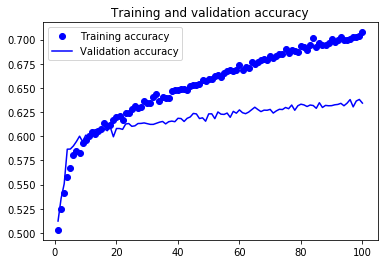

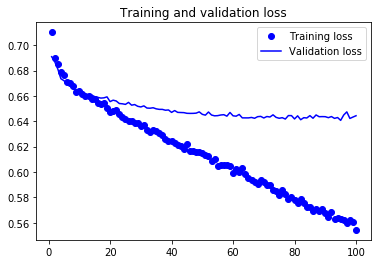

In [28]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [69]:
tn, fp, fn, tp = confusion_matrix(y_test, (model.predict(X_test) > 0.5).astype(int)).ravel()

In [70]:
(tn, fp, fn, tp)

(2612, 1419, 1527, 2381)

### Обучение с чистым текстом

In [2]:
df = pd.read_pickle('ready_for_learning_v2_clear_text_views.pkl.bz2')

In [3]:
df_data, df_labels = df.iloc[:,:-1], df.iloc[:, -1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.3, shuffle=True)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((77583, 3072), (33250, 3072), (77583,), (33250,))

In [6]:
model = tf.keras.Sequential([
tf.keras.layers.Input(shape=(3072,)),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dropout(.5,),
tf.keras.layers.Dense(16, activation='relu'),
# tf.keras.layers.Dropout(.25,),
tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adamax(),
              loss='binary_crossentropy',
              metrics=['acc'])

In [8]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=2048,
                    validation_data=(X_test, y_test))

Epoch 1/100
38/38 [==============================] - 3s 52ms/step - loss: nan - acc: 0.1687 - val_loss: nan - val_acc: 0.1716
Epoch 2/100
38/38 [==============================] - 1s 21ms/step - loss: nan - acc: 0.1694 - val_loss: nan - val_acc: 0.1716
Epoch 3/100
38/38 [==============================] - 1s 21ms/step - loss: nan - acc: 0.1694 - val_loss: nan - val_acc: 0.1716
Epoch 4/100
38/38 [==============================] - 1s 22ms/step - loss: nan - acc: 0.1694 - val_loss: nan - val_acc: 0.1716
Epoch 5/100
38/38 [==============================] - 1s 22ms/step - loss: nan - acc: 0.1694 - val_loss: nan - val_acc: 0.1716
Epoch 6/100
38/38 [==============================] - 1s 22ms/step - loss: nan - acc: 0.1694 - val_loss: nan - val_acc: 0.1716
Epoch 7/100
38/38 [==============================] - 1s 21ms/step - loss: nan - acc: 0.1694 - val_loss: nan - val_acc: 0.1716
Epoch 8/100
38/38 [==============================] - 1s 21ms/step - loss: nan - acc: 0.1694 - val_loss: nan - val_acc:

KeyboardInterrupt: 

### Версия 3 (с опциональным текстом)

### Изображение

In [2]:
df = pd.read_pickle('/home/sergey/maga_diploma/models/embedding/ready_for_learning_image_v3.pkl.bz2')

In [81]:
df.shape

(4533, 3073)

In [37]:
df.drop(df.iloc[:, 2560:-1], inplace = True, axis = 1)

In [38]:
df.head()

,r0000,r0001,r0002,r0003,r0004,r0005,r0006,r0007,r0008,r0009,...,e0503,e0504,e0505,e0506,e0507,e0508,e0509,e0510,e0511,pop_class
-95355317_2050447,0.057344,1.948761,0.443601,0.456698,0.136211,0.164066,1.669898,0.400474,0.215134,0.637504,...,-0.032037,0.002702,0.027234,0.044887,0.028431,-0.040043,0.046949,0.022556,-0.030355,1.0
-95355317_2068015,0.986775,0.541421,0.803849,0.342154,1.045853,0.307013,0.462082,0.018197,1.326146,1.033313,...,-0.075876,-0.009340,0.012022,0.050580,-0.023798,-0.050545,-0.051889,-0.014790,-0.059694,1.0
-91050183_10228,0.589319,0.676640,0.984213,1.006903,0.375679,0.554894,0.596023,0.971159,0.036272,2.200578,...,0.014999,0.003846,0.076692,0.009012,-0.044964,0.033397,0.031373,-0.008496,0.003244,1.0
-91050183_10388,0.070245,0.570792,0.144515,0.305198,1.321359,0.314336,0.816716,0.134760,0.155296,0.449767,...,0.041382,-0.030555,0.012708,0.042611,-0.086130,0.035033,0.057616,-0.000372,0.091140,1.0
-91050183_10489,0.614560,1.066614,1.204115,0.175818,1.112054,1.394015,1.289493,0.663563,0.498381,0.720199,...,-0.042157,0.026059,0.046950,0.014359,-0.052490,-0.079334,-0.050399,0.017420,-0.035428,1.0


In [82]:
df_data, df_labels = df.iloc[:,:-1], df.iloc[:, -1]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.3, shuffle=True)

In [145]:
model = tf.keras.Sequential([
tf.keras.layers.Input(shape=(3072,)),
# tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(64, activation='relu', input_dim=(3072,)),
tf.keras.layers.Dropout(.4,),
tf.keras.layers.Dense(32, activation='relu', input_dim=(3072,)),
# tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])

In [146]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=16,
                    validation_data=(X_test, y_test))

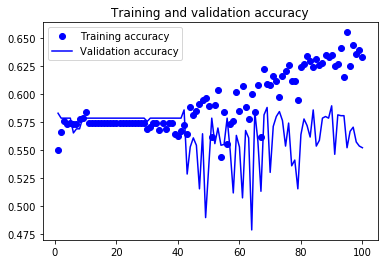

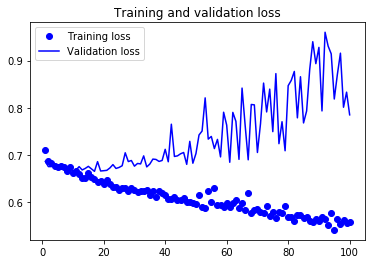

In [148]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [174]:
y_pred = []
for index, row in tqdm(df.iterrows()):
    pred = model.predict(np.array(row[:-1]).reshape(1, 3072))
    # kek = row[:-1]
    # break
    
    # Write prediction
    if pred < 0.5:
        y_pred.append(1.0)
    else:
        y_pred.append(0.0)

4533it [01:56, 38.97it/s]


In [157]:
np.array(kek).reshape(1, 3072).shape

(1, 3072)

In [ ]:
y_pred

In [166]:
y_true = df_labels.to_list()

In [173]:
plot_confusion_matrix(model.classifier, X_test, y_test)

AttributeError: 'Sequential' object has no attribute 'classifier'

In [175]:
confusion_matrix(y_true, y_pred, labels=[1.0, 0.0])

array([[ 111, 1812],
       [1252, 1358]])